First few rows of the dataset:
   Index        pH      Iron   Nitrate    Chloride           Lead      Zinc  \
0      0  8.332988  0.000083  8.605777  122.799772   3.710000e-52  3.434827   
1      1  6.917863  0.000081  3.734167  227.029851   7.850000e-94  1.245317   
2      2  5.443762  0.020106  3.816994  230.995630   5.290000e-76  0.528280   
3      3  7.955339  0.143988  8.224944  178.129940  4.000000e-176  4.027879   
4      4  8.091909  0.002167  9.925788  186.540872  4.170000e-132  3.807511   

            Color  Turbidity  Fluoride  ...  Chlorine     Manganese  \
0       Colorless   0.022683  0.607283  ...  3.708178  2.270000e-15   
1    Faint Yellow   0.019007  0.622874  ...  3.292038  8.020000e-07   
2    Light Yellow   0.319956  0.423423  ...  3.560224  7.007989e-02   
3  Near Colorless   0.166319  0.208454  ...  3.516907  2.468295e-02   
4    Light Yellow   0.004867  0.222912  ...  3.177849  3.296139e-03   

   Total Dissolved Solids  Source  Water Temperature  Air Temperatu

C:\Users\Irfan\AppData\Local\Temp\ipykernel_26328\950192405.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


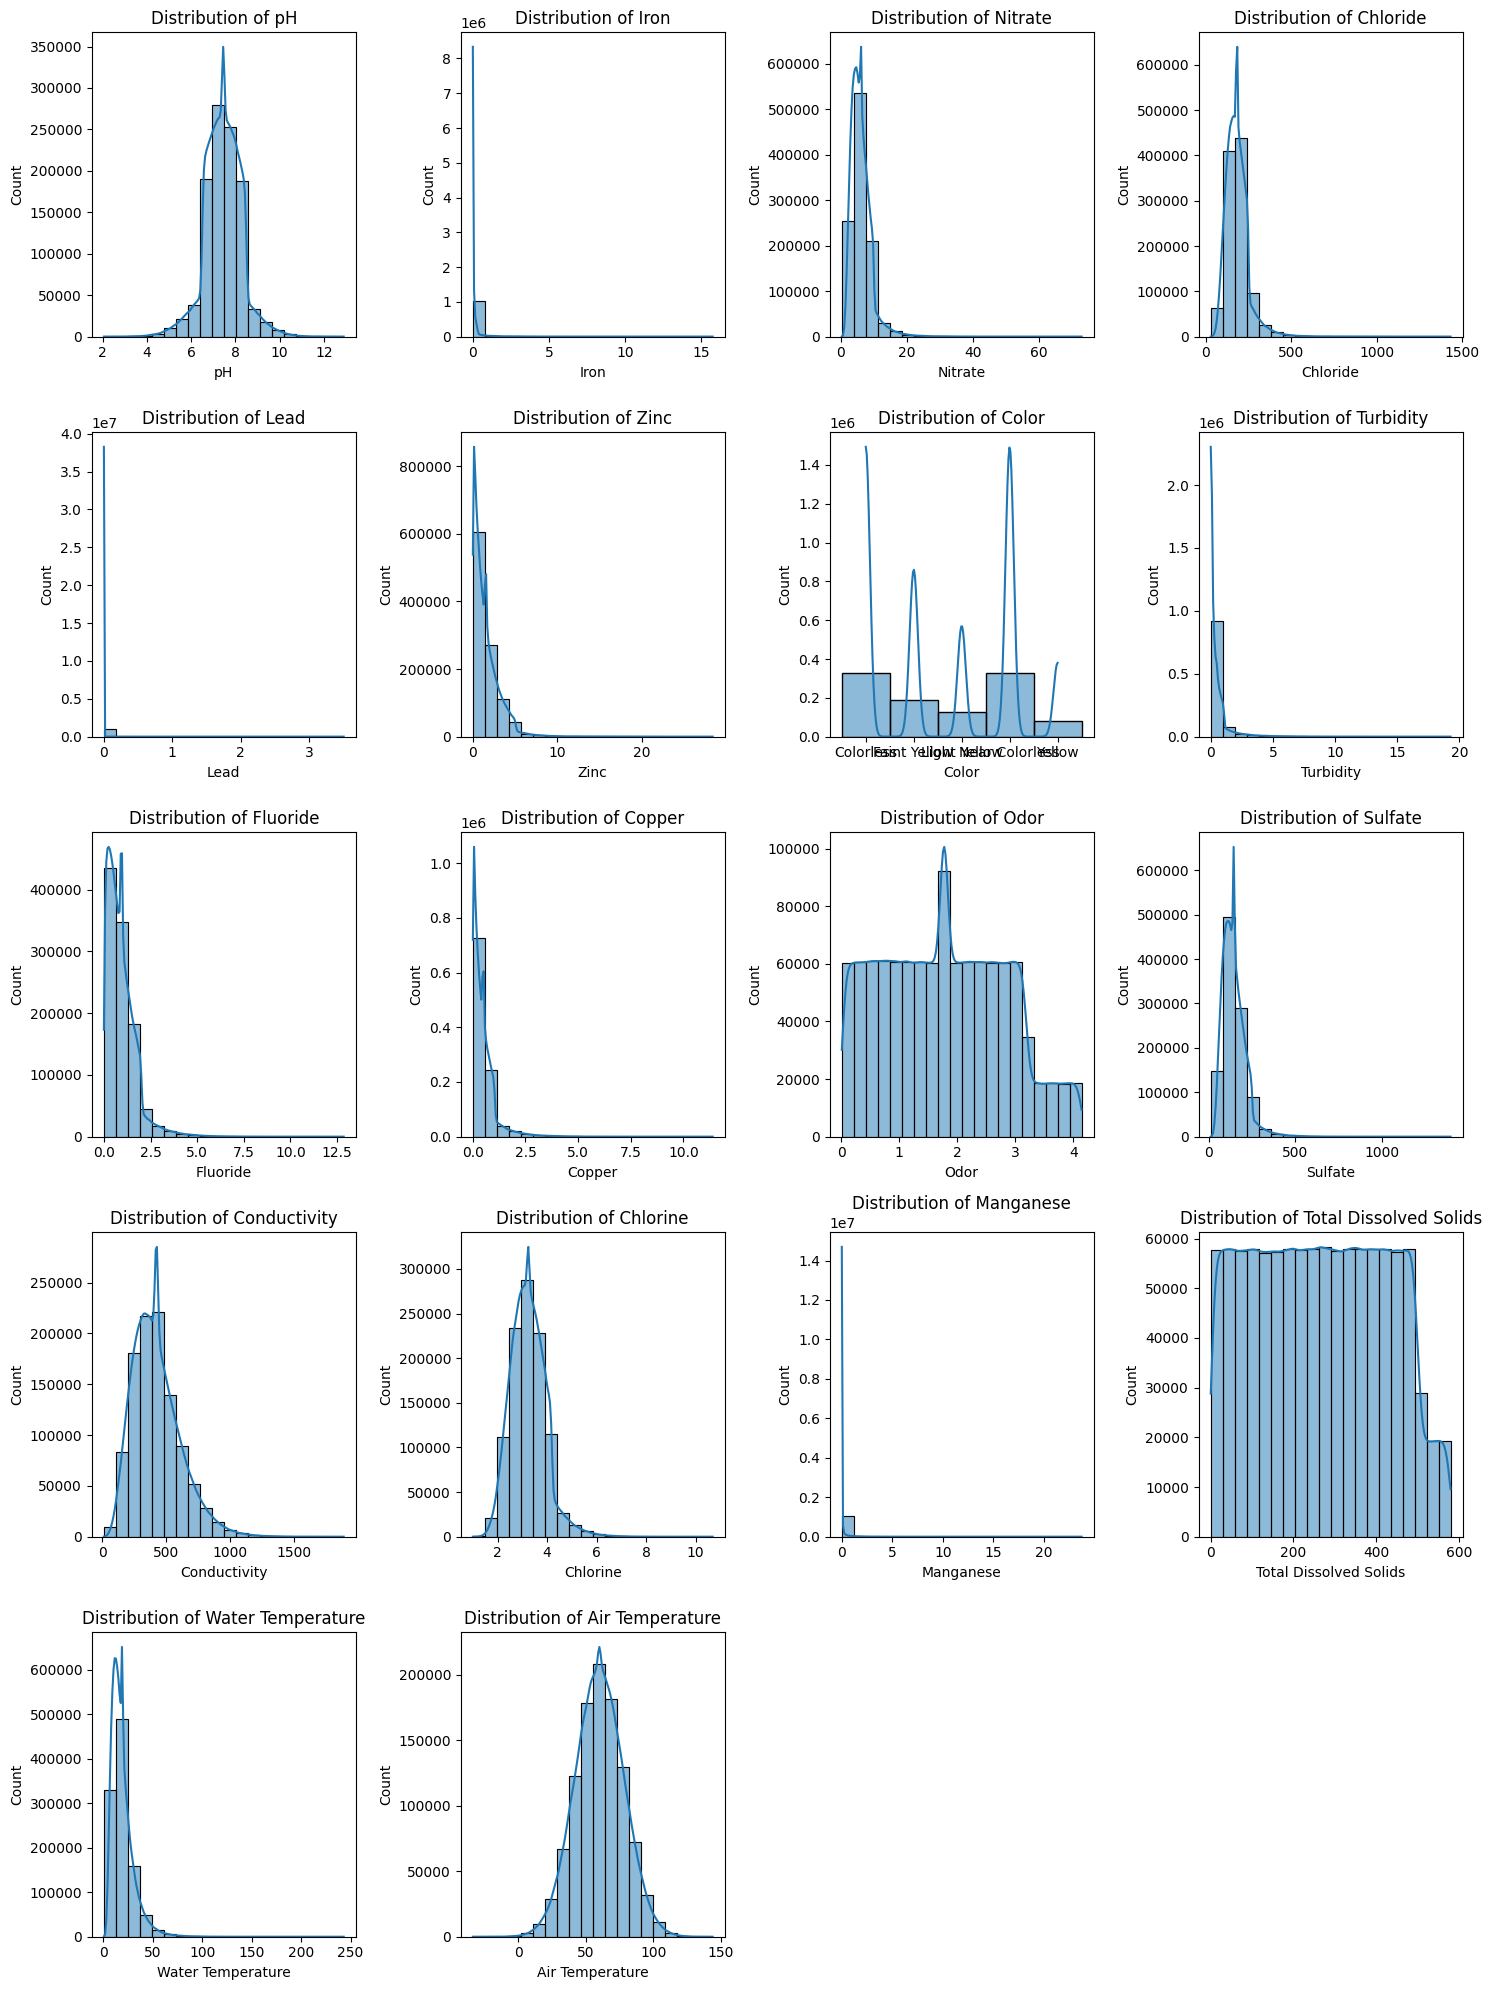

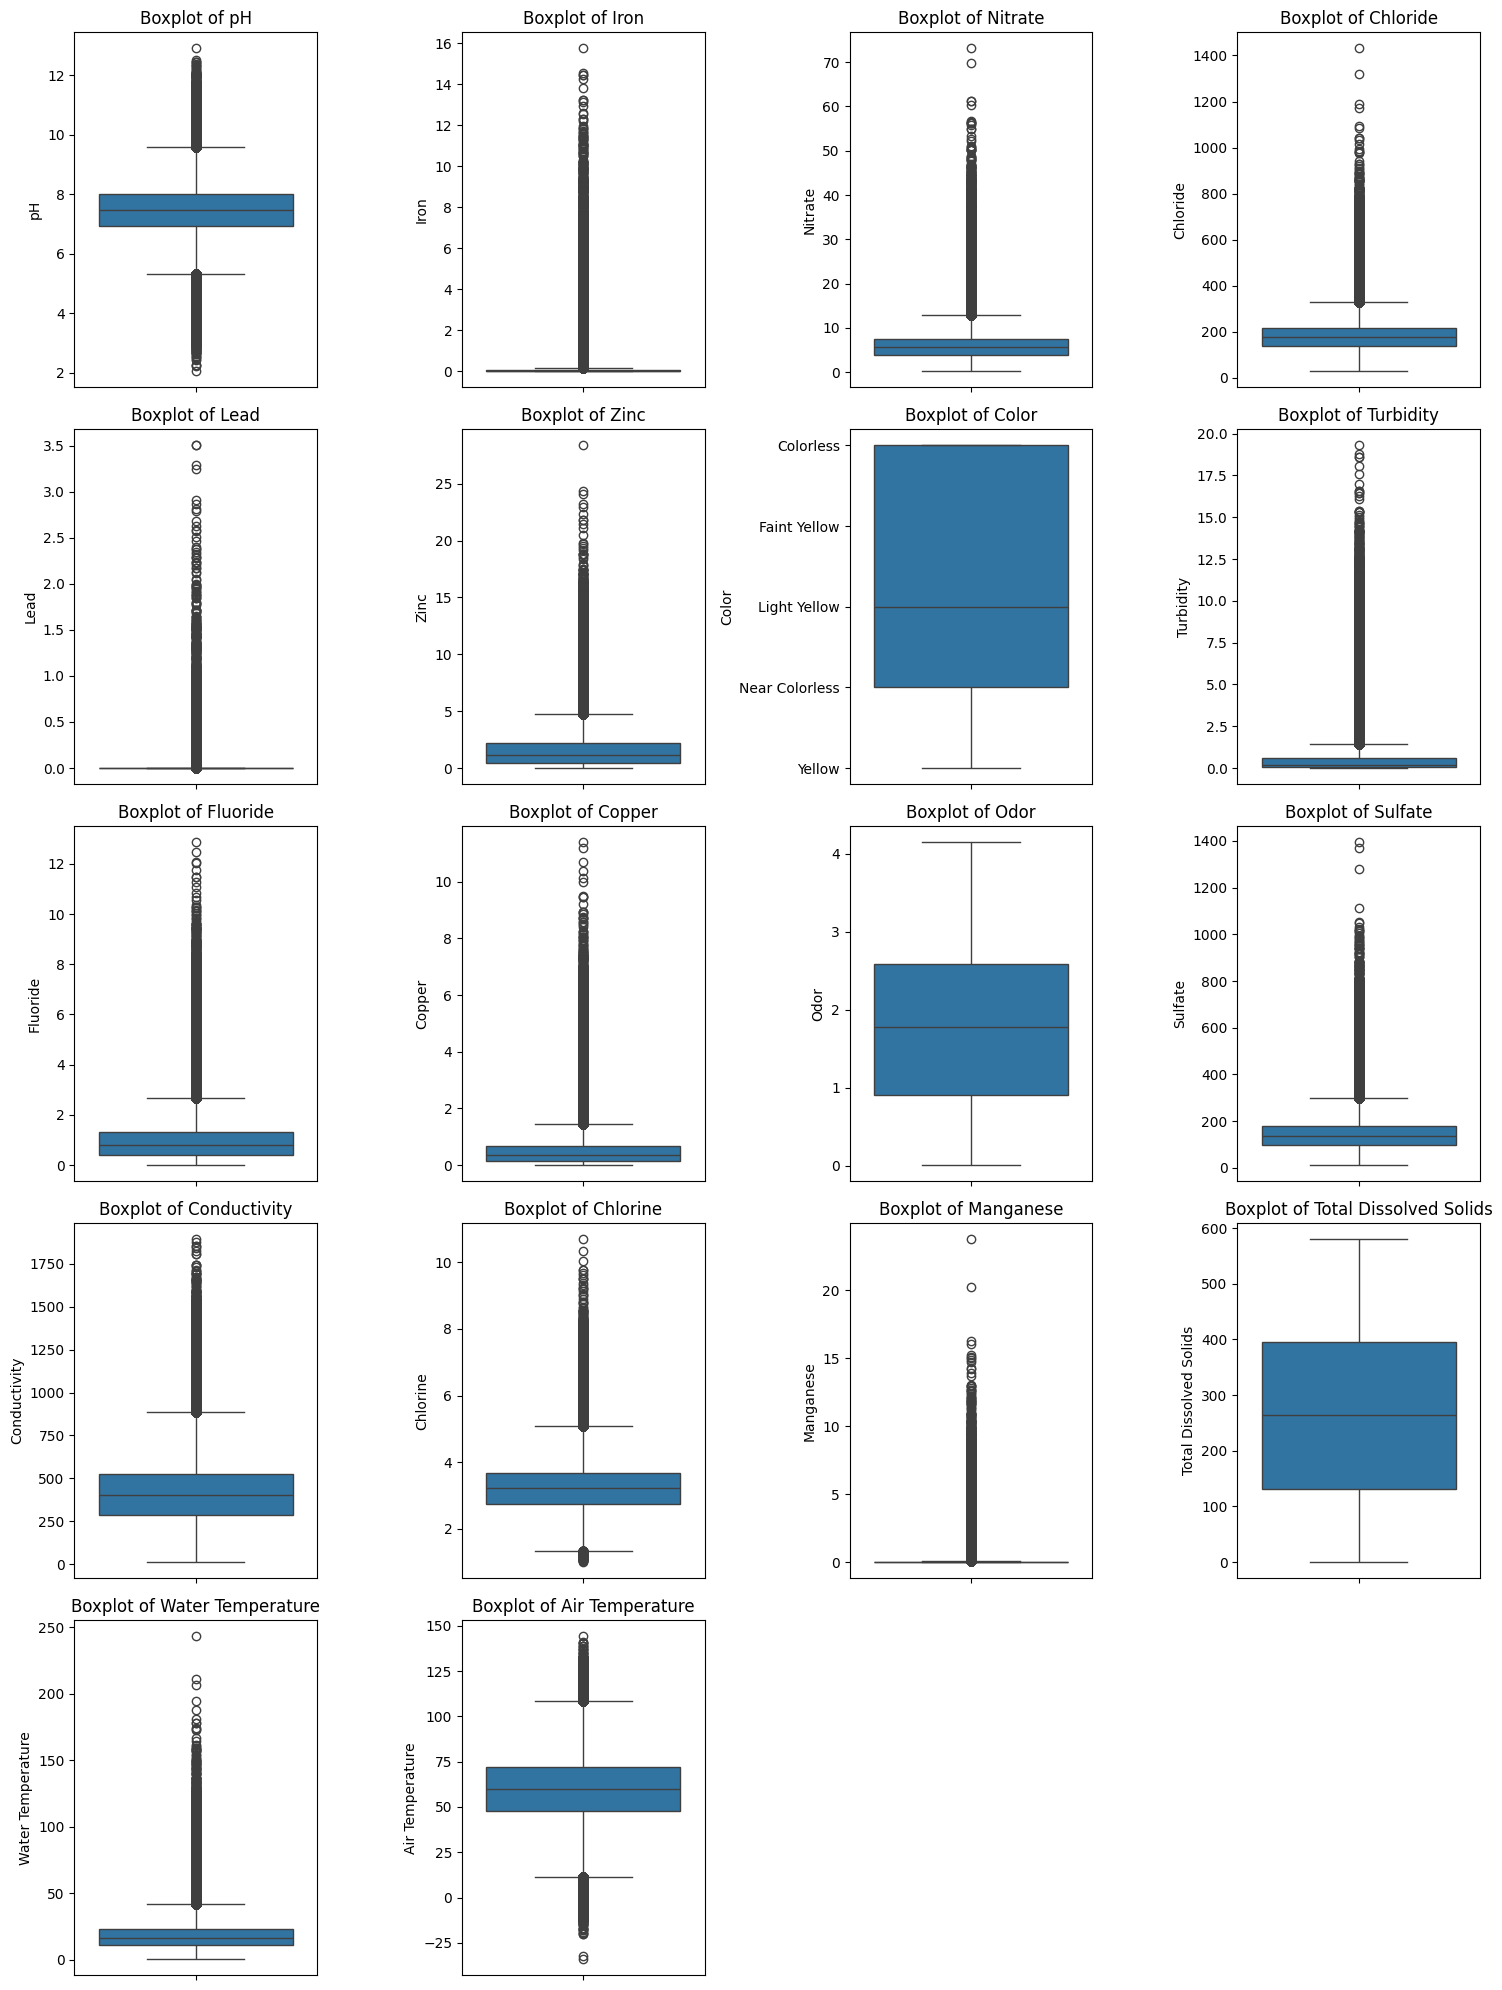

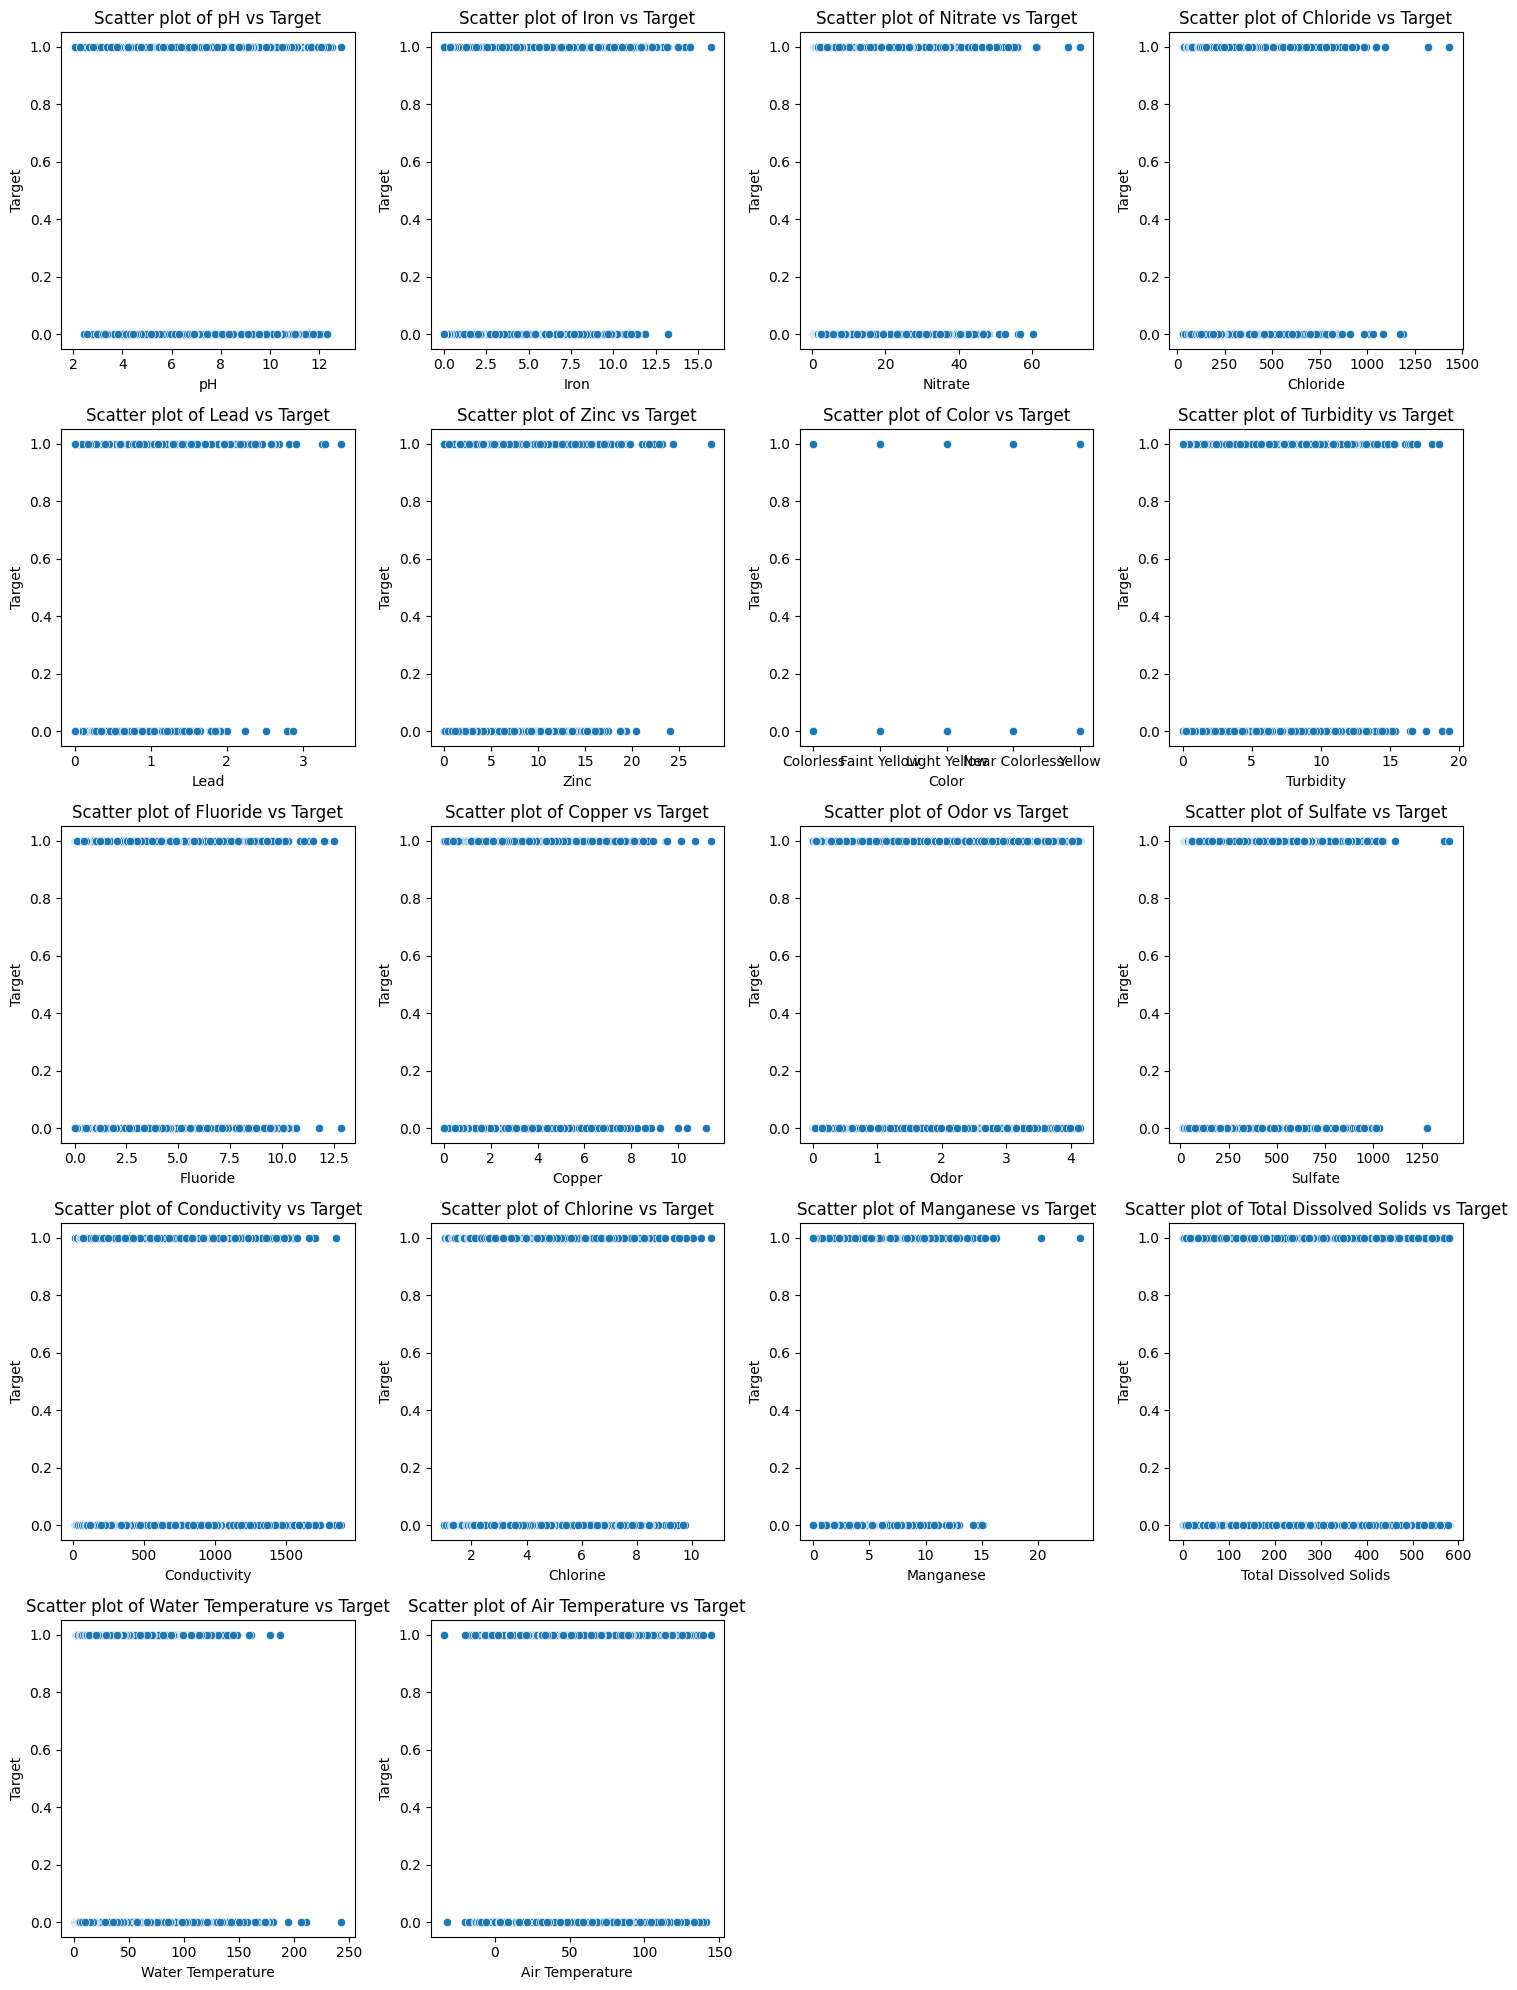

ValueError: could not convert string to float: 'Colorless'

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("water_quality_dataset.csv")

# Data Understanding
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Data Preparation
# Replace missing values with the mean of each column
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].mean(), inplace=True)

# Check for class imbalance
print("\nDistribution of the target variable:")
print(data['Target'].value_counts())

# Data Visualization
# Histograms for numerical features
numerical_features = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                      'Fluoride', 'Copper', 'Sulfate', 'Conductivity', 'Chlorine', 
                      'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=data, x=feature, kde=True, bins=20)  # Adjust the number of bins
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=data, y=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

# Scatter plots for interaction between numerical features and target
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=data, x=feature, y='Target')
    plt.title(f"Scatter plot of {feature} vs Target")
plt.tight_layout()
plt.show()

# Correlation matrix (excluding non-numeric columns)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Define Potential Drawbacks
potential_drawbacks = [
    "The dataset may contain inaccuracies or errors, affecting the reliability of the predictions.",
    "Certain features may have high correlation, leading to multicollinearity issues.",
    "The target variable may not be properly defined, leading to misinterpretation of the results.",
    "Missing values were filled with mean values, which may impact the distribution of the data."
]

print("\nPotential Drawbacks:")
for drawback in potential_drawbacks:
    print("-", drawback)
